# Lab 5

In [1]:
import cv2
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# image = cv2.imread("2.png")
image = cv2.imread("TrinityBikes.JPG")
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## 1) Roberts edge detection

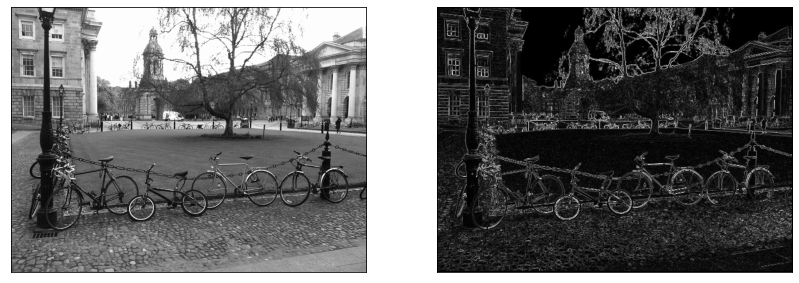

In [3]:
height, width = gray_img.shape

xM = np.array([
    [1,  0],
    [0, -1],
])
yM = np.array([
    [ 0, 1],
    [-1, 0],
])
gradientImage = np.empty((height, width), dtype=np.uint8)
for i in range(1, height - 1):
    for j in range(1, width - 1):
        xGrad = (xM * gray_img[i-1:i+1, j-1:j+1]).sum()
        yGrad   = (yM   * gray_img[i-1:i+1, j-1:j+1]).sum()
        mag = np.sqrt(pow(xGrad, 2) + pow(yGrad, 2))
        gradientImage[i-1, j-1] = mag
gradientImage = gradientImage/gradientImage.max()*255


fig=plt.figure(figsize=(14, 7))

fig.add_subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_img, cmap="gray")

fig.add_subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(gradientImage, cmap="gray")

print()

## 1) Compass edge detection

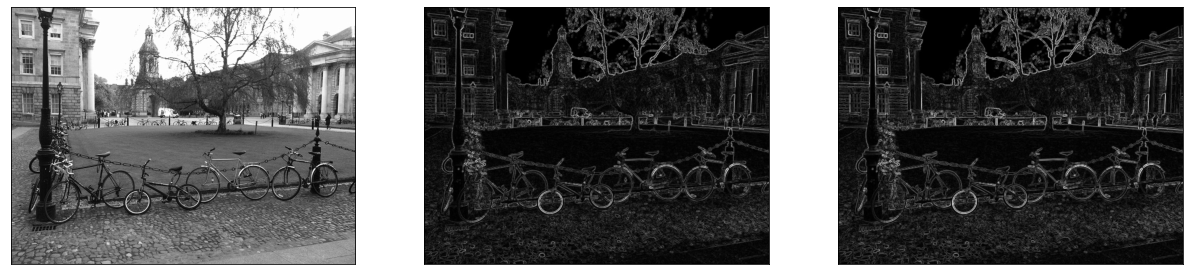

In [4]:
gx = cv2.Sobel(gray_img, cv2.CV_32F, 1, 0)
gy = cv2.Sobel(gray_img, cv2.CV_32F, 0, 1)
abs_gradient = np.absolute(gx) + np.absolute(gy)
l2norm_gradient, orientation = cv2.cartToPolar(gx, gy)


fig=plt.figure(figsize=(21, 7))

fig.add_subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_img, cmap="gray")

fig.add_subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(abs_gradient, cmap="gray")

fig.add_subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.imshow(l2norm_gradient, cmap="gray")

print()

## 2) Laplacian of Gaussian

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



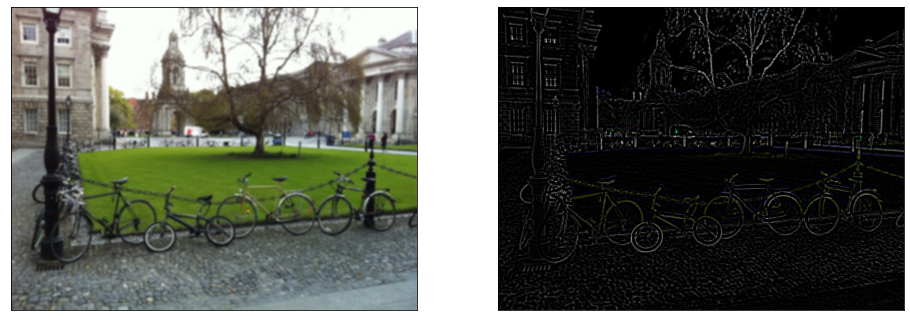

In [5]:
blur_img = cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (5, 5), 2)
laplacian = cv2.Laplacian(blur_img, cv2.CV_32F)
laplacian1 = laplacian/laplacian.max()


fig=plt.figure(figsize=(16, 8))

fig.add_subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(blur_img, cmap="gray")

fig.add_subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(laplacian1, cmap="gray")

print()

## 3) Canny edge detection

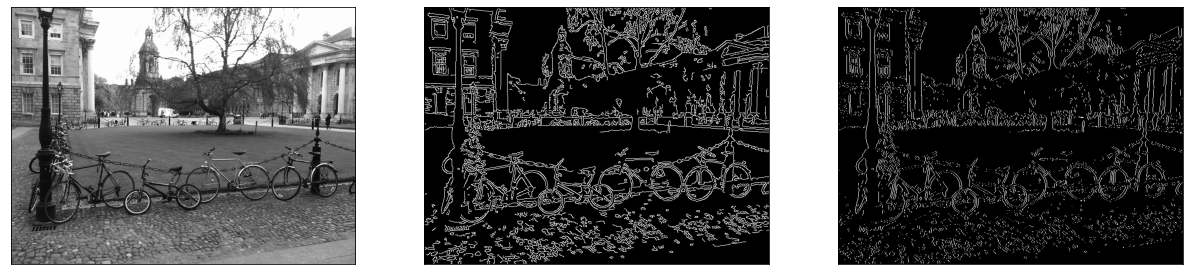

In [6]:
blur_img = cv2.GaussianBlur(gray_img, (3, 3), 2)
сanny = cv2.Canny(blur_img, 100, 200)


def Canny_detector(gray):
    # Gaussian Blurring
    blur = cv2.GaussianBlur(gray,(5,5),0)
    # Magnitude
    sobelx = cv2.Sobel(blur,cv2.CV_32F,1,0,ksize=3)
    absx = np.absolute(sobelx)
    sobelx_u1 = absx/absx.max()*255
    sobelx_u = np.uint8(sobelx_u1)
    # -
    sobely = cv2.Sobel(blur,cv2.CV_32F,0,1,ksize=3)
    absy = np.absolute(sobely)
    sobely_u1 = absy/absy.max()*255
    sobely_u = np.uint8(sobely_u1)
    # -
    mag = np.hypot(sobelx_u, sobely_u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)
    # Find the neighbouring pixels
    M, N = mag.shape
    Non_max = np.zeros((M,N), dtype= np.uint8)
    for i in range(1,M-1):
        for j in range(1,N-1):
            b = mag[i, j+1]
            c = mag[i, j-1]  
            # Non-max Suppression
            if (mag[i,j] >= b) and (mag[i,j] >= c):
                Non_max[i,j] = mag[i,j]
            else:
                Non_max[i,j] = 0

    # Set high and low threshold
    highThreshold = 50
    lowThreshold  = 45
    # -
    M, N = Non_max.shape
    out = np.zeros((M,N), dtype= np.uint8)
    # -
    strong_i, strong_j = np.where(Non_max >= highThreshold)
    zeros_i, zeros_j = np.where(Non_max < lowThreshold)
    # weak edges
    weak_i, weak_j = np.where((Non_max <= highThreshold) & (Non_max >= lowThreshold))
    # Set same intensity value for all edge pixels
    out[strong_i, strong_j] = 255
    out[zeros_i, zeros_j ] = 0
    out[weak_i, weak_j] = 75
    # Hysteresis Thresholding
    M, N = out.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (out[i,j] == 75):
                if 255 in out[i-1:i+1, j-1:j+1]:
                    out[i, j] = 255
                else:
                    out[i, j] = 0
    return out

res = Canny_detector(gray_img)
fig=plt.figure(figsize=(21, 7))

fig.add_subplot(1, 3, 1)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_img, cmap="gray")

fig.add_subplot(1, 3, 2)
plt.xticks([]), plt.yticks([])
plt.imshow(сanny, cmap="gray")

fig.add_subplot(1, 3, 3)
plt.xticks([]), plt.yticks([])
plt.imshow(res, cmap="gray")

print()